# O que fazer com dados NaN ???

Esta e uma pergunta que sempre aparece para profissionais da area de dados, e a resposta para esta pergunta e: "Depende".

Isso realmente faz sentido pois cada situacao possui uma particularidade unica ou semelhante a outra, porem para alguem ingressando agora na area isso e o sulficiente para se arrancar os cabelos.

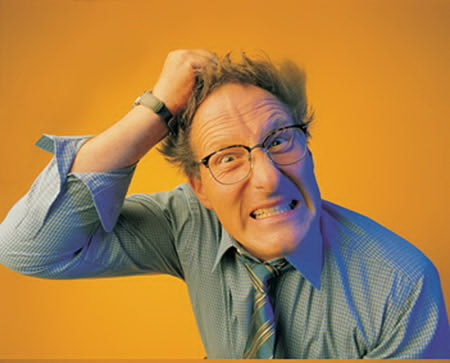

Com base nisso, este arquivo tem o intuito de apresentar a voces como encontrar esses dados, assim como formas de substituir ou apagar o mesmo.

In [1]:
# Primeiramente e necessario importar bibliotecas e dataset para este estudo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics

df_credit = pd.read_csv('credit_data.csv')
df_auto = pd.read_csv('autos.csv', encoding = 'ISO-8859-1')

# 1- Localizar NaN

Para localizar esses dados faltantes, temos diversos metodos, irei apresentar alguns deles.

In [2]:
# PRIMEIRO METODO
# o famoso .isnull()
df_credit.isnull()

,i#clientid,income,age,loan,c#default
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


O mesmo nos retorna nosso dataset com valores booleanos trazendo 'True' quando o dado e nulo, o melhor a se fazer e uma soma disso:

In [3]:
df_credit.isnull().sum()

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

Realizando agora a contagem de quantos nulos por coluna.

Segindo esta linha de raciocinio, podemos analisar isso graficamente, atravez do metodo:

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64


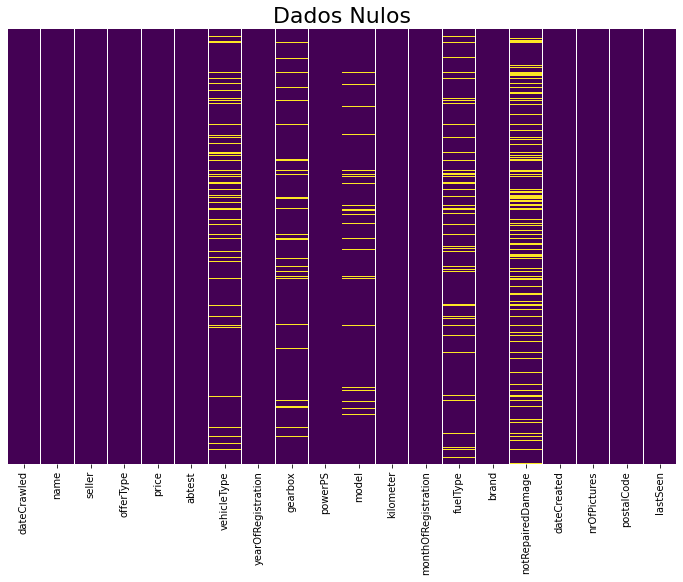

In [4]:
# Visualizando onde ha Valores NaN
print(df_auto.isnull().sum())
plt.figure(figsize=(12,8))
sns.heatmap(df_auto.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Dados Nulos',size = 22)
plt.show()

Onde cada linha amarela e um dado nulo para aquela coluna

In [5]:
# Criando um DataFrame apenas com os dados nulos
nulos = df_auto[df_auto.isnull().any(axis=1)]
nulos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371515,2016-03-09 11:36:55,Skoda_Fabia_Kombi_1.4,privat,Angebot,1690,test,kombi,2004,manuell,55,fabia,150000,4,benzin,skoda,NaN,2016-03-09 00:00:00,0,18246,2016-04-04 08:15:30
371519,2016-03-09 13:37:43,Alfa_Romeo_159_Jtdm_1.9_150_ps_13_600_km_top_voll,privat,Angebot,5250,control,NaN,2016,automatik,150,159,150000,12,NaN,alfa_romeo,nein,2016-03-09 00:00:00,0,51371,2016-03-13 01:44:13
371522,2016-03-21 09:50:58,Mitsubishi_Cold,privat,Angebot,0,control,NaN,2005,manuell,0,colt,150000,7,benzin,mitsubishi,ja,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52


# 2- Substituir NaN

Para Substituir esses dados faltantes, temos diversos metodos, irei apresentar alguns deles.

In [6]:
# Substituir por 0
df_credit.fillna(0).isnull().sum()

i#clientid    0
income        0
age           0
loan          0
c#default     0
dtype: int64

In [7]:
# Substituir pela media
df_credit['age'] = df_credit['age'].replace(to_replace = np.nan, value = df_credit['age'].mean())
df_credit.isnull().sum()

i#clientid    0
income        0
age           0
loan          0
c#default     0
dtype: int64

Porem isso so funciona para dados no formato int ou float, caso seu dado seja str ou object a maneira e substituir pela moda, exemplo:

In [8]:
# Substituir pela Moda
df_auto['fuelType'] = df_auto['fuelType'].replace(to_replace = np.nan, value = statistics.mode(df_auto['fuelType']))
df_auto.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType                   0
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [9]:
# Substituir por 'Nao informado'
df_auto['notRepairedDamage'] = df_auto['notRepairedDamage'].fillna('Nao informado')
print(df_auto.isnull().sum())
df_auto.head()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType                   0
brand                      0
notRepairedDamage          0
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,Nao informado,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,Nao informado,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


# 2- Excluindo NaN

Para Excluir esses dados faltantes, ou uma coluna inteira que possui tais caracteristicas, primeiramente deve ter em mente muita cautela, pois deixaremos de analisar muitos dados, que poderiam ser importantes, mesmo assim, existem ocasioes onde pela falta de uma porcentagem grande de dados em uma coluna, por exemplo, fica invalido substituir pela media de uma pequena parcela dos dados nao nulos, mesmo assim para estas ocasioes temos diversos metodos, irei apresentar alguns deles.

In [10]:
# Apagando somente uma coluna onde a porcentagem de NaN e muito grande
df_auto = df_auto.drop('vehicleType',axis=1)
df_auto.head()

,dateCrawled,name,seller,offerType,price,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,1993,manuell,0,golf,150000,0,benzin,volkswagen,Nao informado,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,2004,automatik,163,grand,125000,8,diesel,jeep,Nao informado,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [12]:
# Apagando linhas com Dados NaN
df_auto = df_auto.dropna()
print(df_auto.shape)
df_auto.head()

(335068, 19)


,dateCrawled,name,seller,offerType,price,abtest,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,1993,manuell,0,golf,150000,0,benzin,volkswagen,Nao informado,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,2004,automatik,163,grand,125000,8,diesel,jeep,Nao informado,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07


Claro que existem outros metodos de tratamento destes valores, porem o intuito deste case foi apresentar alguns dos mais usados, lembrando que sempre e bom usar o dado de fato, entao se tiver a possibilidade de atravez do data mining conseguir esse dado, sera melhor, porem contando com a possivel nao obtencao do mesmo, o mais adequado e substitui-lo de forma a nao comprometer seu dataset e uma futura utilizacao dele.